# Explore here

## Carga de Datos y Procesamiento

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pickle import dump
import matplotlib.pyplot as plt
from sklearn import tree

train_data = pd.read_csv("../models/x_train_sel.csv")
test_data = pd.read_csv("../models/x_test_sel.csv")

train_data.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness,Outcome
0,21.0,0.0,0.0,0.304,84.0,0.0,2.0,0.0,0
1,50.0,28.2,82.0,1.282,112.0,0.0,9.0,24.0,1
2,22.0,28.7,46.0,0.654,139.0,83.0,1.0,19.0,0
3,65.0,21.9,50.0,0.254,161.0,0.0,0.0,0.0,0
4,46.0,46.2,80.0,0.238,134.0,370.0,6.0,37.0,1


## Preparación de Características y Etiquetas:

In [2]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

## Entrenamiento del Modelo Random Forest:

In [3]:


model = RandomForestClassifier(n_estimators = 60, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

## Predicciones

In [4]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

## Evaluación del Modelo:

In [5]:
accuracy_score(y_test, y_pred)

0.7207792207792207

## Visualización del Modelo

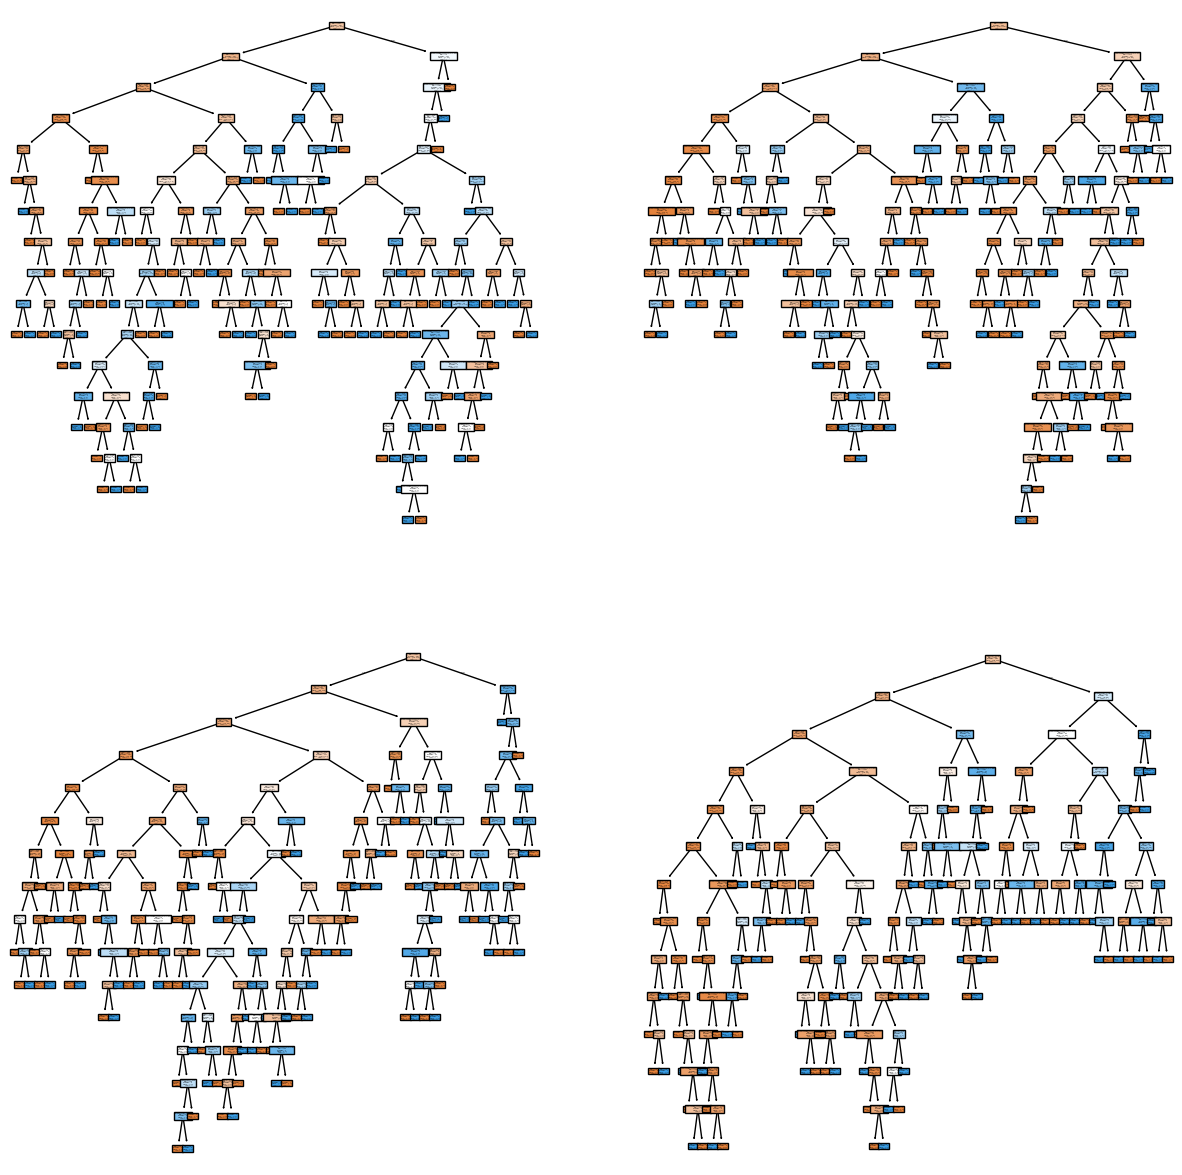

In [6]:
# Visualizar los primeros 4 árboles del Random Forest
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Ajustar class_names a ["0", "1"] ya que tienes un problema de clasificación binaria.
tree.plot_tree(model.estimators_[0], ax=axes[0, 0], feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)
tree.plot_tree(model.estimators_[1], ax=axes[0, 1], feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)
tree.plot_tree(model.estimators_[2], ax=axes[1, 0], feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)
tree.plot_tree(model.estimators_[3], ax=axes[1, 1], feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)

plt.show()

## Guardar el Modelo Entrenado:

In [7]:
dump(model, open("../models/Random_forest_model.sav", "wb"))